In [163]:
#import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import necessary modules that are included into the function
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut,ShuffleSplit
import itertools 
import matplotlib.pyplot as plt

#files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [164]:
#import dataset
dataset = pd.read_csv(r"C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/GlobalModelData/ModellingDataset-Global.csv", sep=';')

pd.set_option('display.max_columns', None)
dataset.describe()

,FID,Longitude,Latitude,wkd_day_value,wnd_day_value,wkd_night_value,wnd_night_value,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,4.820000e+02,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,481.000000,481.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,476.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,240.500000,9.261343,51.197532,26.954116,19.891472,21.943770,19.482789,23.704356,2.958882,15.339811,9.044924,11.042987,14.757297,171.712392,1.759829e+05,1379.668050,141.338174,1.627321e+06,12540.197095,3.855807e+06,37978.475104,357.883817,6154.486286,41489.437120,94125.623430,1212.001476,12.295357,1.529753,12302.269079,101.676785,34352.880077,280.871975,3.874495,2231.118530,68.942846,14.572097,12916.796713,330.254867,26376.055502,732.897073,28.610143,22133.352695,272.058826,32.639911,136692.065999,2314.033584,304244.123667,6247.359697,79.579393,11.888703,5.707740,3.065015,-1.388283,3.377644,7.307135,7.759075,14.236675,18.137460,18.359029,18.242144,13.458786,447.853711,3.617826,3.077223,3.656993,2.804031,3.360133,3.193947,2.921907,2.538312,2.970147,2.658043,2.482413,2.674618,0.000067,44.110073,48.822715,54.784274,32.894402,52.052772,79.125816,123.538727,79.417375,77.112976,69.232866,81.436638,83.921225,0.677052,0.622411,0.571960,3331.373950,128.701763,146.889530,199.251786,417.690278,587.171424
std,139.285678,2.738530,1.621991,16.037734,12.152807,9.692638,8.988529,12.886250,0.135886,13.528546,10.100697,10.940724,12.881364,210.376782,3.420002e+05,5266.517329,595.285466,1.873091e+06,36913.058761,3.917068e+06,95029.695119,1491.693070,4509.973126,34979.658532,88294.089372,2705.754172,73.109976,12.240787,13434.904611,403.926782,30123.308469,911.739711,28.728664,2656.942121,145.932769,34.954581,11587.403831,545.379983,20947.147222,1087.161665,64.267149,13329.888215,236.379343,41.931537,83339.859648,1547.899665,186246.744040,3891.777537,86.872853,1.606676,1.440989,1.549856,2.140847,1

In [165]:
pd.set_option('display.max_columns', None)
dataset.describe()

,FID,Longitude,Latitude,wkd_day_value,wnd_day_value,wkd_night_value,wnd_night_value,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,4.820000e+02,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,481.000000,481.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,476.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,240.500000,9.261343,51.197532,26.954116,19.891472,21.943770,19.482789,23.704356,2.958882,15.339811,9.044924,11.042987,14.757297,171.712392,1.759829e+05,1379.668050,141.338174,1.627321e+06,12540.197095,3.855807e+06,37978.475104,357.883817,6154.486286,41489.437120,94125.623430,1212.001476,12.295357,1.529753,12302.269079,101.676785,34352.880077,280.871975,3.874495,2231.118530,68.942846,14.572097,12916.796713,330.254867,26376.055502,732.897073,28.610143,22133.352695,272.058826,32.639911,136692.065999,2314.033584,304244.123667,6247.359697,79.579393,11.888703,5.707740,3.065015,-1.388283,3.377644,7.307135,7.759075,14.236675,18.137460,18.359029,18.242144,13.458786,447.853711,3.617826,3.077223,3.656993,2.804031,3.360133,3.193947,2.921907,2.538312,2.970147,2.658043,2.482413,2.674618,0.000067,44.110073,48.822715,54.784274,32.894402,52.052772,79.125816,123.538727,79.417375,77.112976,69.232866,81.436638,83.921225,0.677052,0.622411,0.571960,3331.373950,128.701763,146.889530,199.251786,417.690278,587.171424
std,139.285678,2.738530,1.621991,16.037734,12.152807,9.692638,8.988529,12.886250,0.135886,13.528546,10.100697,10.940724,12.881364,210.376782,3.420002e+05,5266.517329,595.285466,1.873091e+06,36913.058761,3.917068e+06,95029.695119,1491.693070,4509.973126,34979.658532,88294.089372,2705.754172,73.109976,12.240787,13434.904611,403.926782,30123.308469,911.739711,28.728664,2656.942121,145.932769,34.954581,11587.403831,545.379983,20947.147222,1087.161665,64.267149,13329.888215,236.379343,41.931537,83339.859648,1547.899665,186246.744040,3891.777537,86.872853,1.606676,1.440989,1.549856,2.140847,1

In [166]:
## == data processing == ##

#get rid off unnecessary variables

#unique identifier and geodata
dataset = dataset.drop(['Longitude', 'Latitude'], axis=1)
#also drop temporal NO2 variables
dataset = dataset.drop(['FID', 'wkd_day_value', 'wnd_day_value', 'wkd_night_value', 'wnd_night_value'], axis=1)
#check for not a number values
dataset.isna().sum().sum()
#remove NA values
dataset = dataset.dropna(axis = 0, how ='any', subset = None, inplace=False)
dataset

,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
0,29.250500,3.192437,22.585377,8.363607,13.402575,21.461321,473.936554,330625,0,0,4466250,39375,6101250,92500,0,8123.319336,54316.64453,95795.42188,0.000000,0.000000,0.0,25200.30273,0.000000,49436.99219,0.000000,0.0,0.000000,0.000000,0.000000,7335.407715,0.000000,28671.41016,0.000000,0.000000,31902.113280,313.874695,67.135361,203502.42190,4167.064941,373058.6875,8838.760742,180.451675,10.528473,3.994838,0.855892,-4.079916,2.809515,6.935457,7.397969,13.671423,18.533785,18.813995,18.982145,12.485922,365.725586,2.585911,2.669442,2.989511,2.531975,2.521507,2.995023,2.301084,1.968707,2.190526,2.260399,1.821999,1.986542,0.000058,32.444660,30.905764,45.278419,86.813194,76.644829,84.025391,139.684372,131.750168,62.195648,54.812149,82.809517,62.866955,1.000663,0.910937,0.882346,2310.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,32.098936,2.766697,23.546194,24.685654,22.862799,23.769573,6.617548,936250,0,0,6596250,19375,16483125,131875,0,9558.207031,76786.28125,215604.75000,11369.980470,0.000000,0.0,34764.07031,1696.450439,62711.52344,2980.910156,0.0,0.000000,0.000000,0.000000,8974.225586,0.000000,47182.19922,0.000000,0.000000,14582.227540,440.061707,0.000000,99596.04688,1850.278076,313205.7188,5933.034668,58.030884,12.299079,6.153886,3.775151,0.131844,2.825560,6.828553,7.554647,13.972361,17.087158,17.238230,17.520105,13.991841,470.292419,3.869850,3.246683,3.802317,2.791856,3.617435,3.091028,3.455901,2.932038,3.273580,2.649281,2.828152,2.777970,0.000081,64.174301,52.970375,69.828476,50.332016,78.252930,146.870132,105.720657,64.659004,70.474373,117.034981,84.549225,82.943985,0.978245,0.744309,0.658124,2518.0,0.000000,0.000000,0.000000,3519.916667,3335.471469
2,58.703744,2.750459,18.290140,15.945211,16.493486,18.070522,18.593605,2500,0,0,343125,0,1212500,0,0,10471.541020,88439.60938,222648.40630,0.000000,0.000000,0.0,0.00000,0.000000,11057.72949,0.000000,0.0,5136.330566,270.224976,46.359188,30608.843750,1437.363037,84130.39844,2333.146484,108.745453,34317.210940,157.915741,10.258605,265563.71880,2016.838379,646760.6250,6662.844727,52.477299,12.236689,6.117405,3.744394,0.196013,2.759445,6.723662,7.453573,13.866946,16.986099,17.125896,17.437189,13.936767,457.479950,3.886321,3.264446,3.828975,2.811795,3.632486,3.095585,3.479126,2.962678,3.304003,2.660490,2.845692,2.803313,0.000076,63.257851,53.338516,68.428001,50.577240,76.791069,146.810501,105.269150,63.642395,72.389526,120.899490,85.652794,83.520721,0.914638,0.847111,0.803237,3216.0,674.791667,674.791667,674.791667,674.791667,674.791667
3,24.249276,2.763114,23.645823,15.955007,18.248226,23.700480,6.414716,2310625,26250,3125,7480000,202500,12168125,645000,8125,11165.945310,76961.00000,185735.31250,0.000000,0.000000,0.0,30830.10938,0.000000,84649.88281,0.000000,0.0,3274

In [167]:
##CREATE DEPENDENT- AND INDEPENDENT VARIABLES
#store all column names
all_column_names = dataset.columns

#create dataset with only predictor variables
x = dataset.drop(["mean_value_NO2"], axis=1)
#store column names of predictor variables
feature_names = x.columns
#dependent variable
y = dataset["mean_value_NO2"]
#verify if dependent variable is out of dataset
print(len(feature_names))

#transform dependent- and independent variables to numpy arrays for calculations
x = np.array(x)
y = np.array(y)

88


In [168]:
#CONSTRUCT FUNCTION - CV FEATURE IMPORTANCE (MEDIAN)

#set initial model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#generate function that creates K-fold CV, thereby creating shap summary plot for each loop/fold.

def cvfi(data_x, data_y, model, nofolds, names):
    ss = ShuffleSplit(n_splits=nofolds, test_size=0.25, random_state=0)
    
    total = list(itertools.repeat(0, 88)) #85 copies of 0 - needed for generating mean of CV
    ranking = []
    
    for train, test in ss.split(data_x, data_y):
        data_x_train = np.array(data_x[train])
        data_y_train = np.array(data_y[train])
        data_x_test = np.array(data_x[test])

        # Train the model on training data
        model.fit(data_x_train, data_y_train)

        shap_values = shap.TreeExplainer(model).shap_values(data_x_train)
#         shap.summary_plot(shap_values, data_x_train, feature_names=names, plot_type='bar')
        shap.summary_plot(shap_values, data_x_train, feature_names=names, plot_type='bar')
        
        #https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
        # according to this source, training dataset is used to calculate shap values
        
        df = pd.DataFrame(feature_names, np.abs(shap_values).mean(0))
        df['index'] = df.index
        df.reset_index(drop=True, inplace=True)
        df.columns = [''] * len(df.columns)
        
        df.columns = ['name','shap']
        print(df)
        df_sort = df.sort_values(by = ['shap'], ascending=False)
        df_sort['rank'] = np.arange(1, len(df) * 1 + 1, 1)
        df_new = df_sort.drop(['shap'], axis=1)
        print(df_new)
#         rnk_pd.append(df_new, ignore_index = True)
        rank_array = df_new.values
        
        print(rank_array)
        ranking.append(rank_array)
  
        #convert importance values to numpy array
        vals= np.abs(shap_values).mean(0)
        print(vals)

        print(len(vals))
        total += vals
    
    print(total)
    print(ranking)
    cvfi.ranking = ranking
    
    cvfi.meanfi = total/nofolds #allows use of local variable outside function
    

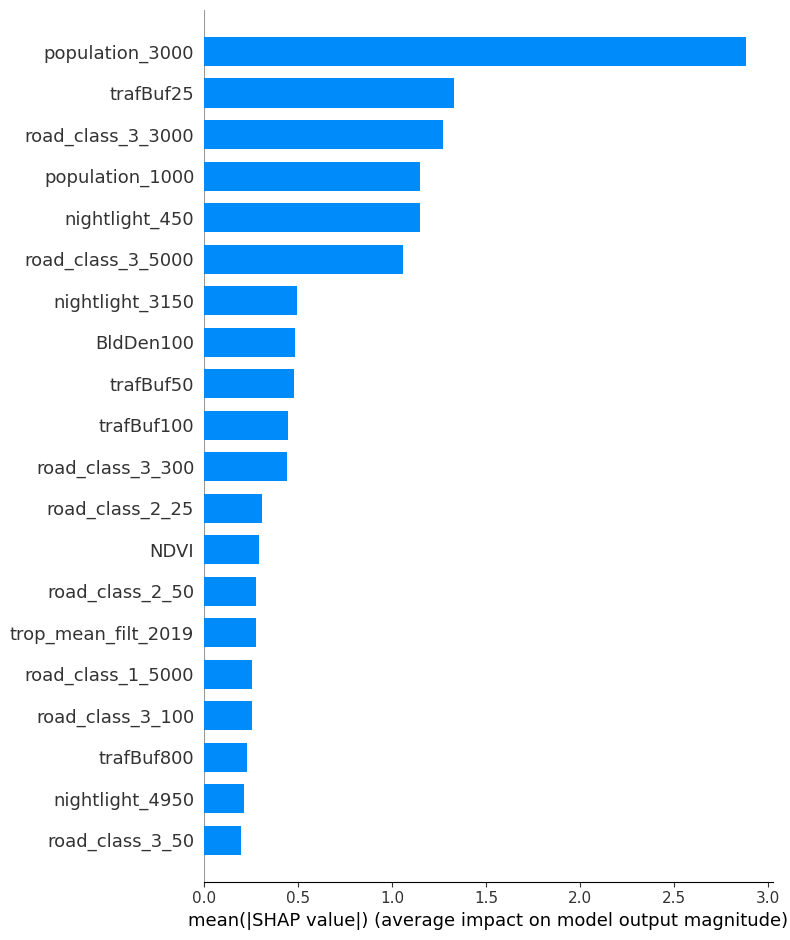

               name      shap
0         radiation  0.069360
1    nightlight_450  1.147869
2   nightlight_4950  0.213058
3   nightlight_3150  0.495949
4    nightlight_900  0.088353
..              ...       ...
83        trafBuf25  1.331387
84        trafBuf50  0.477810
85       trafBuf100  0.445629
86       trafBuf400  0.053461
87       trafBuf800  0.229887

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
83          trafBuf25     2
36  road_class_3_3000     3
14    population_1000     4
1      nightlight_450     5
..                ...   ...
21   road_class_1_300    84
24    road_class_1_50    85
13        industry_50    86
7        industry_100    87
8         industry_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['trafBuf25' 2]
 ['road_class_3_3000' 3]
 ['population_1000' 4]
 ['nightlight_450' 5]
 ['road_class_3_5000' 6]
 ['nightlight_3150' 7]
 ['BldDen100' 8]
 ['trafBuf50' 9]
 ['trafBuf100' 10]
 ['road_class_3_300' 11]
 ['road_class_2_25' 12

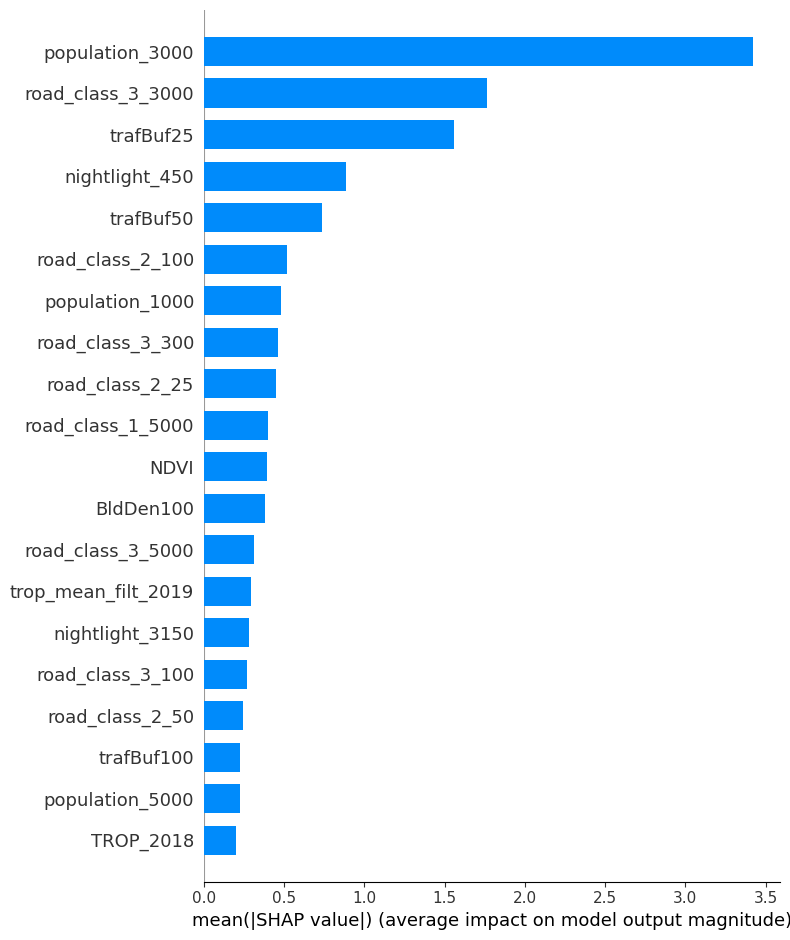

               name      shap
0         radiation  0.049767
1    nightlight_450  0.882838
2   nightlight_4950  0.155055
3   nightlight_3150  0.278112
4    nightlight_900  0.161494
..              ...       ...
83        trafBuf25  1.555478
84        trafBuf50  0.736962
85       trafBuf100  0.224793
86       trafBuf400  0.081451
87       trafBuf800  0.086991

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
36  road_class_3_3000     2
83          trafBuf25     3
1      nightlight_450     4
84          trafBuf50     5
..                ...   ...
18   road_class_1_100    84
24    road_class_1_50    85
8         industry_25    86
13        industry_50    87
19    road_class_1_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_3_3000' 2]
 ['trafBuf25' 3]
 ['nightlight_450' 4]
 ['trafBuf50' 5]
 ['road_class_2_100' 6]
 ['population_1000' 7]
 ['road_class_3_300' 8]
 ['road_class_2_25' 9]
 ['road_class_1_5000' 10]
 ['NDVI' 11]
 ['BldDen100' 12]
 ['

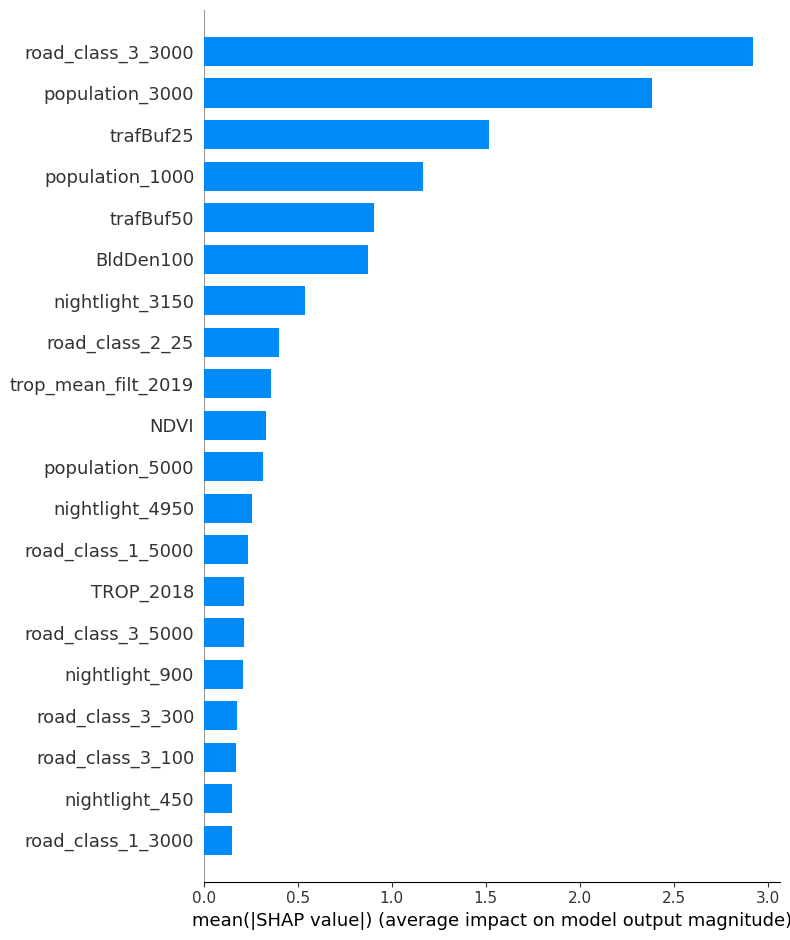

               name      shap
0         radiation  0.061856
1    nightlight_450  0.151002
2   nightlight_4950  0.255619
3   nightlight_3150  0.538982
4    nightlight_900  0.205801
..              ...       ...
83        trafBuf25  1.514640
84        trafBuf50  0.905820
85       trafBuf100  0.094969
86       trafBuf400  0.051620
87       trafBuf800  0.076529

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
83          trafBuf25     3
14    population_1000     4
84          trafBuf50     5
..                ...   ...
19    road_class_1_25    84
10       industry_300    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['trafBuf25' 3]
 ['population_1000' 4]
 ['trafBuf50' 5]
 ['BldDen100' 6]
 ['nightlight_3150' 7]
 ['road_class_2_25' 8]
 ['trop_mean_filt_2019' 9]
 ['NDVI' 10]
 ['population_5000' 11]
 ['nightlight_4950' 12]
 [

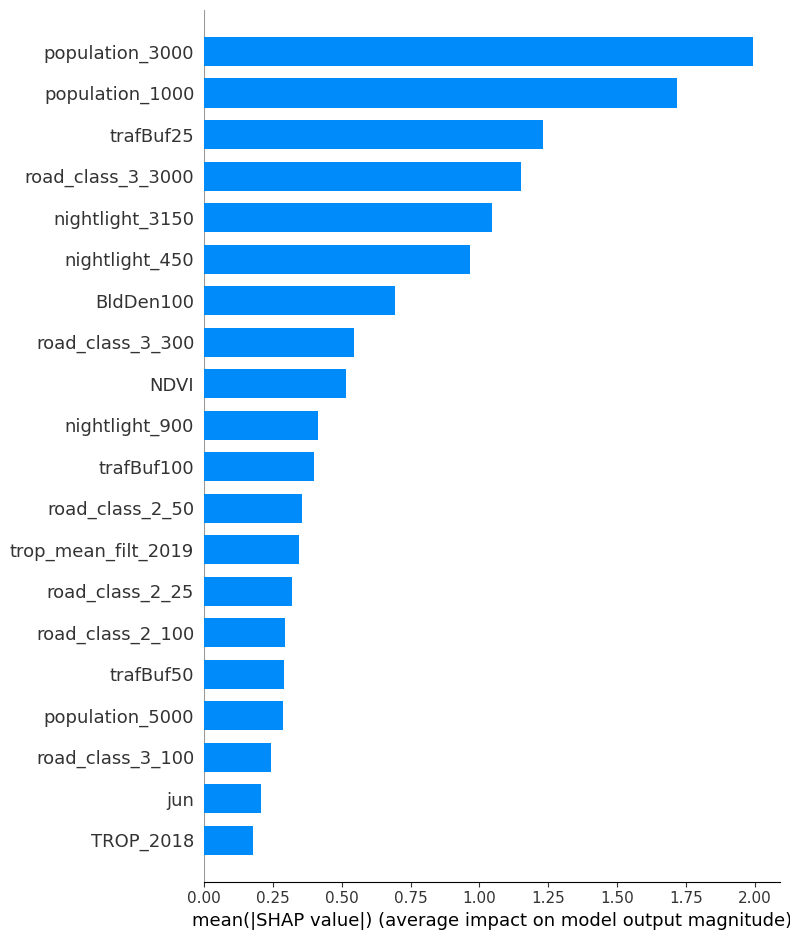

               name      shap
0         radiation  0.086066
1    nightlight_450  0.964910
2   nightlight_4950  0.145989
3   nightlight_3150  1.046591
4    nightlight_900  0.413309
..              ...       ...
83        trafBuf25  1.230587
84        trafBuf50  0.289089
85       trafBuf100  0.400426
86       trafBuf400  0.110978
87       trafBuf800  0.148908

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
14    population_1000     2
83          trafBuf25     3
36  road_class_3_3000     4
3     nightlight_3150     5
..                ...   ...
7        industry_100    84
24    road_class_1_50    85
8         industry_25    86
13        industry_50    87
19    road_class_1_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['population_1000' 2]
 ['trafBuf25' 3]
 ['road_class_3_3000' 4]
 ['nightlight_3150' 5]
 ['nightlight_450' 6]
 ['BldDen100' 7]
 ['road_class_3_300' 8]
 ['NDVI' 9]
 ['nightlight_900' 10]
 ['trafBuf100' 11]
 ['road_class_2_50' 12]
 ['tro

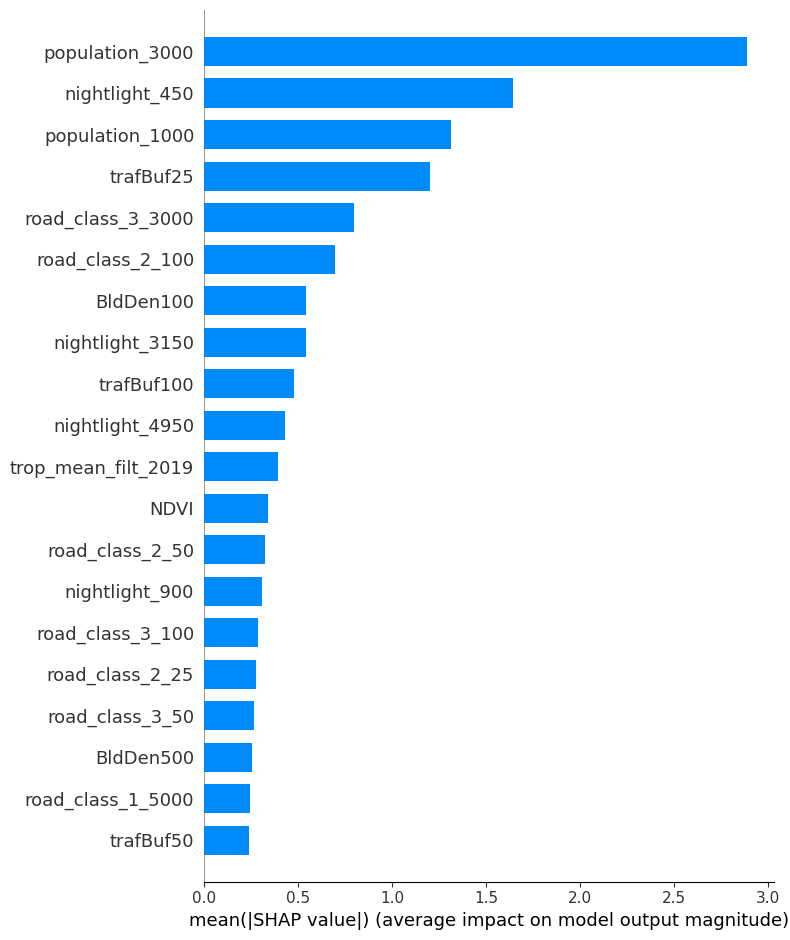

               name      shap
0         radiation  0.080812
1    nightlight_450  1.643848
2   nightlight_4950  0.432033
3   nightlight_3150  0.542707
4    nightlight_900  0.308059
..              ...       ...
83        trafBuf25  1.201046
84        trafBuf50  0.240553
85       trafBuf100  0.476199
86       trafBuf400  0.098187
87       trafBuf800  0.193586

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
1      nightlight_450     2
14    population_1000     3
83          trafBuf25     4
36  road_class_3_3000     5
..                ...   ...
24    road_class_1_50    84
19    road_class_1_25    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['nightlight_450' 2]
 ['population_1000' 3]
 ['trafBuf25' 4]
 ['road_class_3_3000' 5]
 ['road_class_2_100' 6]
 ['BldDen100' 7]
 ['nightlight_3150' 8]
 ['trafBuf100' 9]
 ['nightlight_4950' 10]
 ['trop_mean_filt_2019' 11]
 ['NDVI' 12]
 

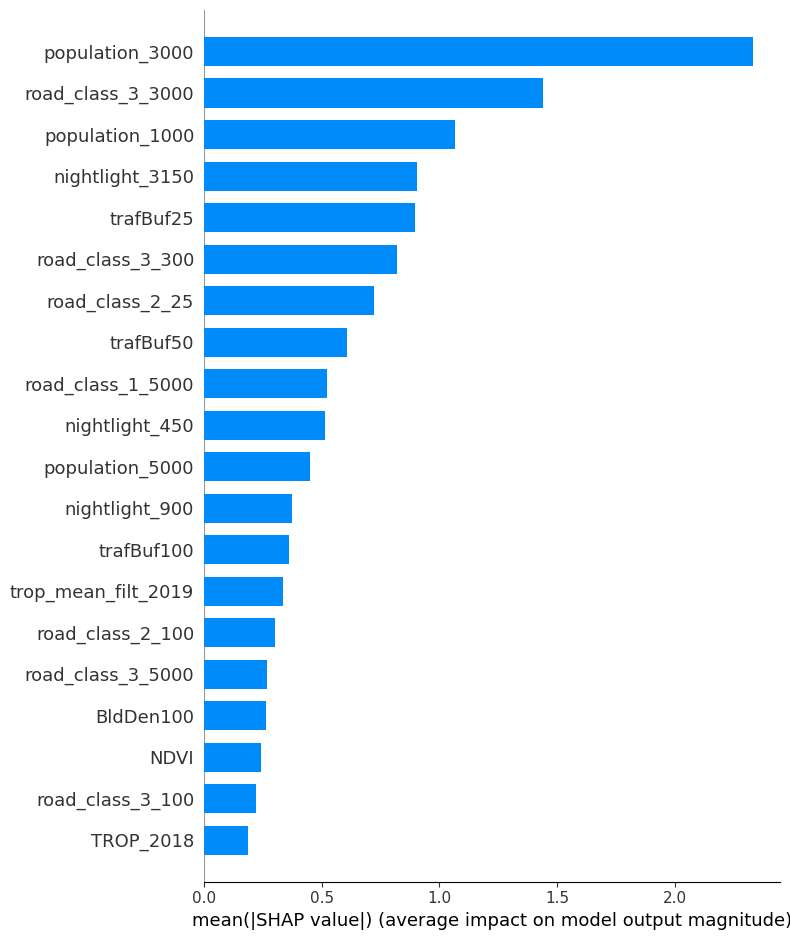

               name      shap
0         radiation  0.031344
1    nightlight_450  0.512549
2   nightlight_4950  0.094178
3   nightlight_3150  0.904829
4    nightlight_900  0.374693
..              ...       ...
83        trafBuf25  0.896151
84        trafBuf50  0.606816
85       trafBuf100  0.360842
86       trafBuf400  0.127911
87       trafBuf800  0.139843

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
36  road_class_3_3000     2
14    population_1000     3
3     nightlight_3150     4
83          trafBuf25     5
..                ...   ...
7        industry_100    84
19    road_class_1_25    85
8         industry_25    86
13        industry_50    87
24    road_class_1_50    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_3_3000' 2]
 ['population_1000' 3]
 ['nightlight_3150' 4]
 ['trafBuf25' 5]
 ['road_class_3_300' 6]
 ['road_class_2_25' 7]
 ['trafBuf50' 8]
 ['road_class_1_5000' 9]
 ['nightlight_450' 10]
 ['population_5000' 11]
 ['nightlig

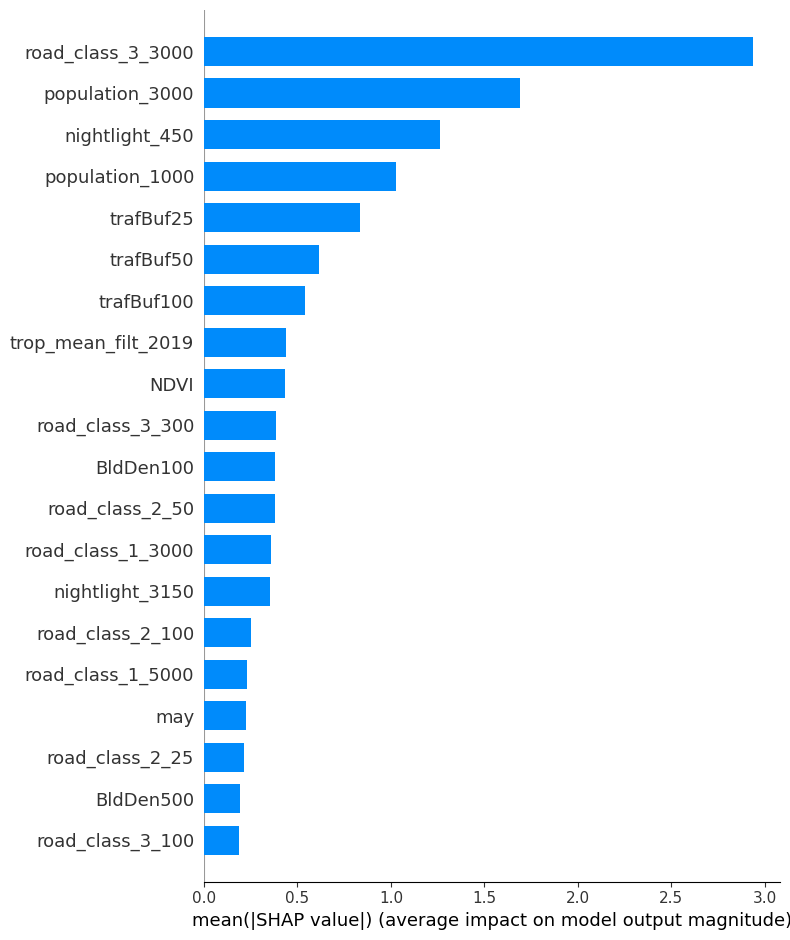

               name      shap
0         radiation  0.087941
1    nightlight_450  1.263409
2   nightlight_4950  0.107549
3   nightlight_3150  0.355369
4    nightlight_900  0.152820
..              ...       ...
83        trafBuf25  0.835248
84        trafBuf50  0.614704
85       trafBuf100  0.542982
86       trafBuf400  0.127061
87       trafBuf800  0.073756

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
1      nightlight_450     3
14    population_1000     4
83          trafBuf25     5
..                ...   ...
10       industry_300    84
24    road_class_1_50    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['nightlight_450' 3]
 ['population_1000' 4]
 ['trafBuf25' 5]
 ['trafBuf50' 6]
 ['trafBuf100' 7]
 ['trop_mean_filt_2019' 8]
 ['NDVI' 9]
 ['road_class_3_300' 10]
 ['BldDen100' 11]
 ['road_class_2_50' 12]
 ['road

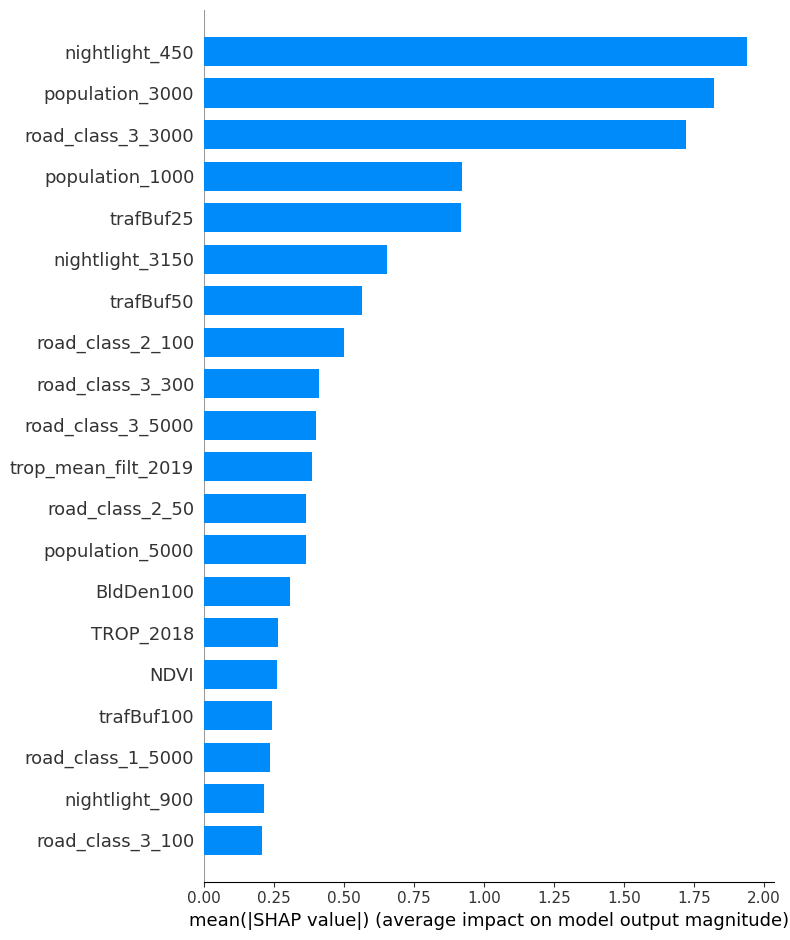

               name      shap
0         radiation  0.036706
1    nightlight_450  1.939883
2   nightlight_4950  0.122008
3   nightlight_3150  0.652580
4    nightlight_900  0.214546
..              ...       ...
83        trafBuf25  0.918823
84        trafBuf50  0.563625
85       trafBuf100  0.244672
86       trafBuf400  0.149539
87       trafBuf800  0.154723

[88 rows x 2 columns]
                 name  rank
1      nightlight_450     1
15    population_3000     2
36  road_class_3_3000     3
14    population_1000     4
83          trafBuf25     5
..                ...   ...
10       industry_300    84
24    road_class_1_50    85
13        industry_50    86
7        industry_100    87
8         industry_25    88

[88 rows x 2 columns]
[['nightlight_450' 1]
 ['population_3000' 2]
 ['road_class_3_3000' 3]
 ['population_1000' 4]
 ['trafBuf25' 5]
 ['nightlight_3150' 6]
 ['trafBuf50' 7]
 ['road_class_2_100' 8]
 ['road_class_3_300' 9]
 ['road_class_3_5000' 10]
 ['trop_mean_filt_2019' 11]
 ['roa

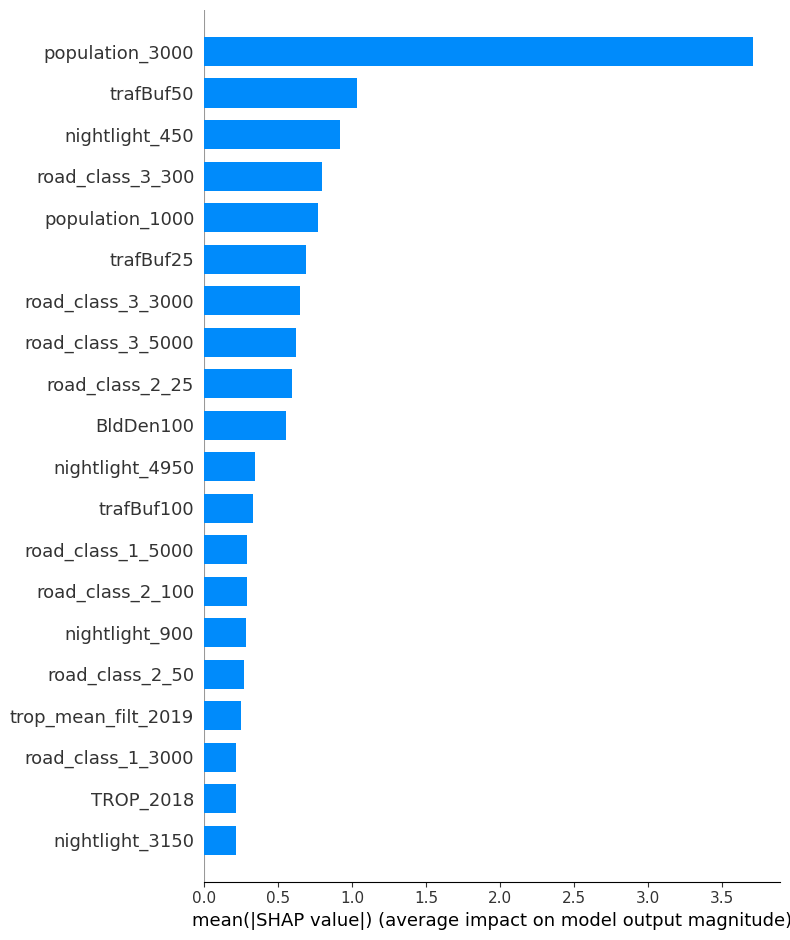

               name      shap
0         radiation  0.048357
1    nightlight_450  0.917030
2   nightlight_4950  0.345505
3   nightlight_3150  0.213753
4    nightlight_900  0.284533
..              ...       ...
83        trafBuf25  0.690060
84        trafBuf50  1.032123
85       trafBuf100  0.330772
86       trafBuf400  0.030058
87       trafBuf800  0.044462

[88 rows x 2 columns]
                name  rank
15   population_3000     1
84         trafBuf50     2
1     nightlight_450     3
37  road_class_3_300     4
14   population_1000     5
..               ...   ...
10      industry_300    84
24   road_class_1_50    85
7       industry_100    86
8        industry_25    87
13       industry_50    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['trafBuf50' 2]
 ['nightlight_450' 3]
 ['road_class_3_300' 4]
 ['population_1000' 5]
 ['trafBuf25' 6]
 ['road_class_3_3000' 7]
 ['road_class_3_5000' 8]
 ['road_class_2_25' 9]
 ['BldDen100' 10]
 ['nightlight_4950' 11]
 ['trafBuf100' 12]
 ['road_cl

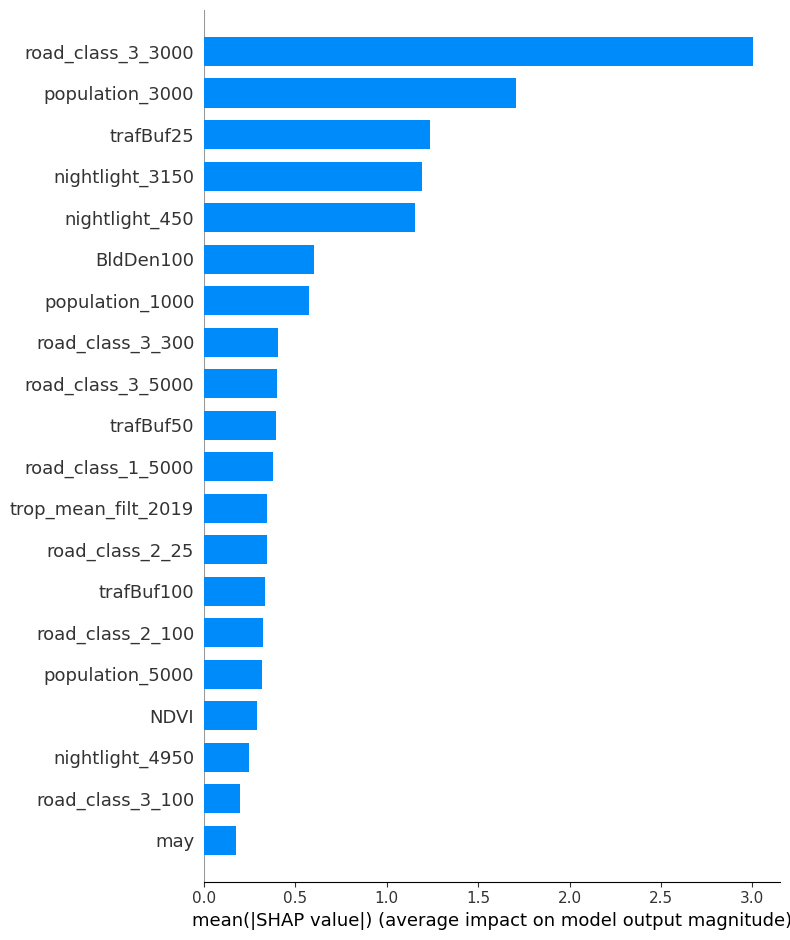

               name      shap
0         radiation  0.108151
1    nightlight_450  1.156222
2   nightlight_4950  0.247478
3   nightlight_3150  1.191660
4    nightlight_900  0.158572
..              ...       ...
83        trafBuf25  1.237439
84        trafBuf50  0.394576
85       trafBuf100  0.332790
86       trafBuf400  0.102025
87       trafBuf800  0.052799

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
83          trafBuf25     3
3     nightlight_3150     4
1      nightlight_450     5
..                ...   ...
18   road_class_1_100    84
24    road_class_1_50    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['trafBuf25' 3]
 ['nightlight_3150' 4]
 ['nightlight_450' 5]
 ['BldDen100' 6]
 ['population_1000' 7]
 ['road_class_3_300' 8]
 ['road_class_3_5000' 9]
 ['trafBuf50' 10]
 ['road_class_1_5000' 11]
 ['trop_mean_fi

In [169]:
cvfi(x, y, rf, 10, feature_names) #argumens: dependent variable; independent variables; model; amount of k-fold; feature names

In [170]:
rank = cvfi.ranking
print(rank)


[array([['population_3000', 1],
       ['trafBuf25', 2],
       ['road_class_3_3000', 3],
       ['population_1000', 4],
       ['nightlight_450', 5],
       ['road_class_3_5000', 6],
       ['nightlight_3150', 7],
       ['BldDen100', 8],
       ['trafBuf50', 9],
       ['trafBuf100', 10],
       ['road_class_3_300', 11],
       ['road_class_2_25', 12],
       ['NDVI', 13],
       ['road_class_2_50', 14],
       ['trop_mean_filt_2019', 15],
       ['road_class_1_5000', 16],
       ['road_class_3_100', 17],
       ['trafBuf800', 18],
       ['nightlight_4950', 19],
       ['road_class_3_50', 20],
       ['road_class_1_3000', 21],
       ['road_class_2_100', 22],
       ['temperature_2m_2', 23],
       ['may', 24],
       ['population_5000', 25],
       ['TROP_2018', 26],
       ['jul', 27],
       ['BldDen500', 28],
       ['dec', 29],
       ['road_class_3_1000', 30],
       ['wind_speed_10m_4', 31],
       ['road_class_3_25', 32],
       ['nightlight_900', 33],
       ['nov', 34],
  

In [171]:
first_round = rank[0]
# print(st_round)
second_round = rank[1]
third_round = rank[2]
fourth_round = rank[3]
fifth_round = rank[4]
sixth_round = rank[5]
seventh_round = rank[6]
eigth_round = rank[7]
ninth_round = rank[8]
tenth_round = rank[9]


In [172]:
#create pandas dataframe from each fold of ranking
df_1 = pd.DataFrame(first_round, columns = ['name', 'rank'])
# print(df_1)
df_2 = pd.DataFrame(second_round, columns = ['name', 'rank_2'])
# frames = [df_1, df_2]
df_3 = pd.DataFrame(third_round, columns = ['name', 'rank_3'])
df_4 = pd.DataFrame(fourth_round, columns = ['name', 'rank_4'])
df_5 = pd.DataFrame(fifth_round, columns = ['name', 'rank_5'])
df_6 = pd.DataFrame(sixth_round, columns = ['name', 'rank_6'])
df_7 = pd.DataFrame(seventh_round, columns = ['name', 'rank_7'])
df_8 = pd.DataFrame(eigth_round, columns = ['name', 'rank_8'])
df_9 = pd.DataFrame(ninth_round, columns = ['name', 'rank_9'])
df_10 = pd.DataFrame(tenth_round, columns = ['name', 'rank_10'])
result = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], axis=1)
print(result)

                 name rank               name rank_2               name   
0     population_3000    1    population_3000      1  road_class_3_3000  \
1           trafBuf25    2  road_class_3_3000      2    population_3000   
2   road_class_3_3000    3          trafBuf25      3          trafBuf25   
3     population_1000    4     nightlight_450      4    population_1000   
4      nightlight_450    5          trafBuf50      5          trafBuf50   
..                ...  ...                ...    ...                ...   
83   road_class_1_300   84   road_class_1_100     84    road_class_1_25   
84    road_class_1_50   85    road_class_1_50     85       industry_300   
85        industry_50   86        industry_25     86       industry_100   
86       industry_100   87        industry_50     87        industry_50   
87        industry_25   88    road_class_1_25     88        industry_25   

   rank_3               name rank_4               name rank_5   
0       1    population_3000      

In [173]:
#store all dataframes into one
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

In [174]:
#assign all dataframes to one dataframe that shows ranking per fold.
from functools import reduce
df_allranks = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
print(df_allranks)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8   
0     population_3000    1      1      2      1      1      1      2      2  \
1           trafBuf25    2      3      3      3      4      5      5      5   
2   road_class_3_3000    3      2      1      4      5      2      1      3   
3     population_1000    4      7      4      2      3      3      4      4   
4      nightlight_450    5      4     19      6      2     10      3      1   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
83   road_class_1_300   84     77     66     55     81     32     59     82   
84    road_class_1_50   85     85     81     85     84     88     85     85   
85        industry_50   86     87     87     87     87     87     87     86   
86       industry_100   87     83     86     84     86     84     86     87   
87        industry_25   88     86     88     86     88     86     88     88   

   rank_9 rank_10  
0       1       2  
1       6  

In [175]:
df_allranks.head()

,name,rank,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
0,population_3000,1,1,2,1,1,1,2,2,1,2
1,trafBuf25,2,3,3,3,4,5,5,5,6,3
2,road_class_3_3000,3,2,1,4,5,2,1,3,7,1
3,population_1000,4,7,4,2,3,3,4,4,5,7
4,nightlight_450,5,4,19,6,2,10,3,1,3,5


In [176]:
#drop string variable to do numpy calculations - necessary for obtaining median
df_fornumpy = df_allranks.drop(['name'], axis=1)
df_fornumpy.head()

,rank,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
0,1,1,2,1,1,1,2,2,1,2
1,2,3,3,3,4,5,5,5,6,3
2,3,2,1,4,5,2,1,3,7,1
3,4,7,4,2,3,3,4,4,5,7
4,5,4,19,6,2,10,3,1,3,5


In [177]:
#convert dataframe to numpy array. Moreover sort values per list to obtain median.
df_num = df_fornumpy
num = df_num.to_numpy()
num_sort = np.sort(num)
print(num_sort)

[[1 1 1 1 1 1 2 2 2 2]
 [2 3 3 3 3 4 5 5 5 6]
 [1 1 1 2 2 3 3 4 5 7]
 [2 3 3 4 4 4 4 5 7 7]
 [1 2 3 3 4 5 5 6 10 19]
 [6 8 9 10 13 15 16 23 31 31]
 [4 4 5 6 7 7 8 14 15 20]
 [6 6 7 7 8 10 11 12 14 17]
 [2 5 5 6 7 8 9 10 16 20]
 [7 9 10 11 12 13 14 17 18 27]
 [4 6 8 8 8 9 10 11 17 22]
 [7 8 9 9 12 13 14 16 18 36]
 [9 9 10 11 12 13 16 17 18 23]
 [12 12 12 13 14 16 17 21 22 41]
 [8 9 11 11 12 13 14 14 15 17]
 [9 10 11 13 13 16 16 18 19 22]
 [15 16 17 18 18 19 19 20 20 25]
 [18 23 23 24 24 32 34 37 43 48]
 [10 11 12 18 19 24 25 27 28 30]
 [17 20 22 23 26 26 28 35 38 38]
 [13 18 20 21 21 22 22 26 28 29]
 [6 6 8 14 15 15 15 15 22 22]
 [21 23 24 24 26 30 31 31 37 49]
 [17 20 21 24 25 26 26 28 29 38]
 [11 11 13 16 17 19 21 23 24 25]
 [14 15 19 20 20 20 23 25 26 27]
 [24 27 33 34 34 37 41 43 43 56]
 [18 19 21 21 25 26 28 28 31 33]
 [21 23 27 27 27 28 29 30 31 32]
 [22 28 30 33 35 51 53 53 55 55]
 [30 31 36 37 39 39 42 44 47 50]
 [21 25 26 27 29 29 31 32 32 40]
 [10 12 14 15 16 19 22 23 24 33]
 

In [178]:
##identify median per ranking
np_num = np.array(num_sort)
# print(np_num)
med_pervar = []
for i in np_num:
    #generate median for each variable (i.e. per list)
    k = np.median(i)
    print(k) 
    med_pervar.append(k)


1.0
3.5
2.5
4.0
4.5
14.0
7.0
9.0
7.5
12.5
8.5
12.5
12.5
15.0
12.5
14.5
18.5
28.0
21.5
26.0
21.5
15.0
28.0
25.5
18.0
20.0
35.5
25.5
27.5
43.0
39.0
29.0
17.5
34.5
68.0
34.0
36.5
53.5
47.5
40.5
50.5
38.5
53.0
30.0
67.0
43.0
51.0
54.5
49.5
58.0
54.5
56.0
67.5
52.0
46.5
70.0
72.0
50.0
63.5
54.5
67.0
49.5
66.0
57.5
50.5
65.0
63.5
69.0
51.0
66.5
56.5
70.5
47.5
75.5
66.0
79.0
44.0
79.0
76.5
58.5
67.0
83.0
83.5
70.5
85.0
87.0
86.0
88.0


In [179]:
print(med_pervar)

[1.0, 3.5, 2.5, 4.0, 4.5, 14.0, 7.0, 9.0, 7.5, 12.5, 8.5, 12.5, 12.5, 15.0, 12.5, 14.5, 18.5, 28.0, 21.5, 26.0, 21.5, 15.0, 28.0, 25.5, 18.0, 20.0, 35.5, 25.5, 27.5, 43.0, 39.0, 29.0, 17.5, 34.5, 68.0, 34.0, 36.5, 53.5, 47.5, 40.5, 50.5, 38.5, 53.0, 30.0, 67.0, 43.0, 51.0, 54.5, 49.5, 58.0, 54.5, 56.0, 67.5, 52.0, 46.5, 70.0, 72.0, 50.0, 63.5, 54.5, 67.0, 49.5, 66.0, 57.5, 50.5, 65.0, 63.5, 69.0, 51.0, 66.5, 56.5, 70.5, 47.5, 75.5, 66.0, 79.0, 44.0, 79.0, 76.5, 58.5, 67.0, 83.0, 83.5, 70.5, 85.0, 87.0, 86.0, 88.0]


In [180]:
##assign extra column to dataframe that calculates median of all rankings per variable
df_allranks['median'] = med_pervar
print(df_allranks)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8   
0     population_3000    1      1      2      1      1      1      2      2  \
1           trafBuf25    2      3      3      3      4      5      5      5   
2   road_class_3_3000    3      2      1      4      5      2      1      3   
3     population_1000    4      7      4      2      3      3      4      4   
4      nightlight_450    5      4     19      6      2     10      3      1   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
83   road_class_1_300   84     77     66     55     81     32     59     82   
84    road_class_1_50   85     85     81     85     84     88     85     85   
85        industry_50   86     87     87     87     87     87     87     86   
86       industry_100   87     83     86     84     86     84     86     87   
87        industry_25   88     86     88     86     88     86     88     88   

   rank_9 rank_10  median  
0       1       2     1

In [181]:
df_cvmedian = df_allranks.sort_values(by=['median'])
print(df_cvmedian)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8   
0     population_3000    1      1      2      1      1      1      2      2  \
2   road_class_3_3000    3      2      1      4      5      2      1      3   
1           trafBuf25    2      3      3      3      4      5      5      5   
3     population_1000    4      7      4      2      3      3      4      4   
4      nightlight_450    5      4     19      6      2     10      3      1   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
82    road_class_1_25   83     88     84     88     85     85     77     80   
84    road_class_1_50   85     85     81     85     84     88     85     85   
86       industry_100   87     83     86     84     86     84     86     87   
85        industry_50   86     87     87     87     87     87     87     86   
87        industry_25   88     86     88     86     88     86     88     88   

   rank_9 rank_10  median  
0       1       2     1

In [182]:
#export option
df_cvmedian.to_csv('C:/Users/foeke/OneDrive/Documenten/submitting paper/All scripts - paper/data/GlobalModelData/df median shap cv10.csv')